In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import vtk
import csv
from bisect import bisect


ModuleNotFoundError: No module named 'vtkOpenGLKitPython'

In [12]:
def vtkToCSV(fileIn, fileOut):
    reader = vtk.vtkGenericDataObjectReader()
    reader.SetFileName(fileIn)
    reader.Update()

    point_obj = reader.GetOutput()
    points = point_obj.GetPoints()

    table = vtk.vtkDataObjectToTable()
    table.SetInputData(point_obj)
    table.Update()
    table.GetOutput().AddColumn(points.GetData())
    table.Update()

    writer = vtk.vtkDelimitedTextWriter()
    writer.SetInputConnection(table.GetOutputPort())
    writer.SetFileName(fileOut)
    writer.Update()
    writer.Write()

def grade(score, breakpoints=breakpoint, marks='abcde'):
#         print(score)
        i = bisect(breakpoints, score)
#         print(marks[i])
        return marks[i]

import math
def get_si(counter):
    p = 0
    for i in range(0, len(counter[0])):
#         print(counter[1][i])
        if counter[1][i]!=0:
            p = p + ((counter[0][i]/counter[1][i])/0.5 - 1) ** 2
#         print(p)
    p = p/len(counter[0])
    return math.sqrt(p)


In [50]:
general_path = '../../BTP/salma/ErgunTestMPIbottomLpra_6_12/post/'
multi = ['dump_liggghts_run.130000.','dump_liggghts_run.125000.', 'dump_liggghts_run.155000.', 'dump_liggghts_run.240000.', 'dump_liggghts_run.255000.']

all_si = []
for i in range(0, len(multi)):
    fileIn = general_path + multi[i] + 'vtk'
    fileOut  =  general_path + multi[i] + 'csv'
#     print(fileOut)

    vtkToCSV(fileIn,fileOut)
    d140 = pd.read_csv(fileOut)
    data = d140.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})
    height = (data['z'].max()+0.0001)/5
    breakpoint = [height, height*2, height*3, height*4, height*5]
#     print(breakpoint)
    
    s = d140[(d140.mass <= 0.00002 )]
    l = d140[(d140.mass >= 0.00002 )]
    smaller = s.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})
    larger = l.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})
    a,b,c,d,e= [], [], [] ,[], []
    small_lists = [a,b,c,d,e]
    marks = 'abcde'
    for item in [(grade(score),score) for score in smaller.z ]:
        l = marks.index(item[0])
        small_lists[l].append(item[1])

    a,b,c,d,e= [], [], [] ,[], []
    large_lists = [a,b,c,d,e]    
    for item in [(grade(score),score) for score in larger.z ]:
        l = marks.index(item[0])
        large_lists[l].append(item[1])
        
    small_sub = [ len(small_lists[0]),len(small_lists[1]),len(small_lists[2]),len(small_lists[3]),len(small_lists[4])]
#     print(small_sub)
    
    large_sub = [ len(large_lists[0]),len(large_lists[1]),len(large_lists[2]),len(large_lists[3]),len(large_lists[4])]
#     print(large_sub)
    
#     colors = {'small particles':'orange', 'large particles':'red'}         
#     labels = list(colors.keys())
#     handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#     plt.legend(handles, labels)
#     X = np.arange(5)
#     plt.ylabel('Number of particles')
#     plt.title('Number of partilcles in different section of packed bed')
#     plt.xticks(X, ('H1', 'H2', 'H3', 'H4', 'H5'))

#     plt.bar(X + 0.00, counter[0], color = 'y', width = 0.25)
#     plt.bar(X + 0.25, counter[1], color = 'r', width = 0.25)

#     plt.show()
    
    counter = [small_sub, large_sub]
    print(counter)
    si = get_si(counter)
    print(si)
    all_si.append(si)
print(all_si)

[[7067, 2916, 17, 0, 0], [914, 1492, 2137, 5217, 240]]
6.64280185450852
[[7503, 2493, 4, 0, 0], [783, 1542, 2839, 4836, 0]]
8.209030474336739


IndexError: string index out of range

In [38]:
all_si.append(0.8)
all_si

[6.387602042474206,
 7.837580651367861,
 1.501324710166626,
 2.282551993953829,
 20.940911319611118,
 0.8]

ValueError: x and y must be the same size

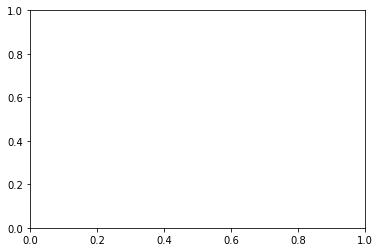

In [51]:
names = [0,1,2,3,4, 5]
values = all_si
val = [1,1,1,1,1,1]

fig, ax = plt.subplots()
ax.scatter(names, values, label="SI Index", marker='d')
ax.plot(names, val, label="dog", color='g', linestyle='dashed')
# ax.plot(activity, cat, label="cat")
ax.legend()

plt.show()